# Final Project Submission

Please fill out:
* Student name: Hogan Byun
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
ls

CONTRIBUTING.md    README.md          halfway-there.gif
LICENSE.md         data/              student.ipynb


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
df = pd.read_csv('data/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Cleaning

### sqft_basement

sqft_basement is type object - convert to type int

In [8]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1990.0        1
1816.0        1
283.0         1
3000.0        1
276.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
1990.0    0.000046
1816.0    0.000046
283.0     0.000046
3000.0    0.000046
276.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

There seems to be some '?' as a value for sqft_basement (around 2% of values) and we know that sqft_living and sqft_above don't have '?' values because the data-type for these are int64

Instead of dropping these, remember that the sqft_basement and sqft_above variables should add up to sqft_living.
So, make sqft_basement for these '?' values to be (sqft_living - sqft_above)

In [10]:
# Test run
df_basement_test = df

In [11]:
df_basement_test['sqft_basement_test'] = df_basement_test['sqft_living'] - df_basement_test['sqft_above']

In [12]:
df_basement_test['sqft_basement_test']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement_test, Length: 21597, dtype: int64

In [13]:
df_basement_test['sqft_basement_test'].value_counts() / len(df_basement_test['sqft_basement_test'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement_test, Length: 306, dtype: float64

No more '?' values, we can now replace sqft_basement with new values

In [14]:
df = df.assign(sqft_basement=df_basement_test['sqft_basement_test'])

In [15]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_test'],
      dtype='object')

In [17]:
df.drop('sqft_basement_test', axis=1, inplace=True)

### sq_ft living

In [18]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.323799,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.302808,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.283440,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.087884,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


<AxesSubplot:>

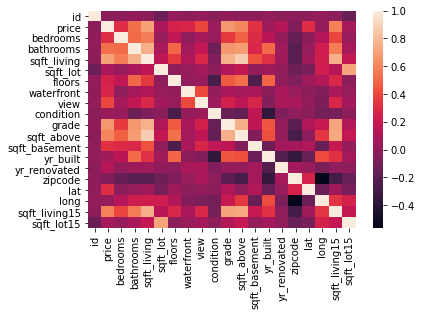

In [19]:
sns.heatmap(df.corr())

sqft_living and sqft_above have a high colinearity of .876 -> drop sqft_above

In [20]:
df.drop('sqft_above', axis=1, inplace=True)

### Waterfront and yr_renovated

There seem to be missing values in waterfront and yr_renovated - makes sense because not all houses will have waterfronts or be renovated

Investigate waterfront further:

In [21]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [22]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.11001527989998611

Waterfront seems to be described as 1 or 0, indicating whether the house has a waterfront (1) or does not have one (0). If not specifically mentioned (NaN), assume there is no waterfront.

In [23]:
df['waterfront'] = df['waterfront'].fillna(0)

In [24]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.0

In [25]:
# waterfront seems to be 0 or 1, so change data type to int
df['waterfront'] = df['waterfront'].astype(int)

0 seems to be used in a similar way to yr_renovated, so repeat the process with yr_renovated

In [26]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [27]:
df['yr_renovated'].isna().sum()

3842

In [28]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [29]:
df['yr_renovated'].isna().sum() / len(df['yr_renovated'])

0.0

In [30]:
# change data type to int
df['yr_renovated'] = df['yr_renovated'].astype(int)

### date

Replace 'date' column with month only -> makes it easier to view as a categorical variable

In [31]:
df['date_dateformat'] = pd.to_datetime(df['date'])

In [32]:
df['month'] = df.date_dateformat.dt.month

In [33]:
df['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [34]:
df.drop('date_dateformat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

### id

No need for id for this particular project

In [35]:
df.drop('id', axis=1, inplace=True)

### view

In [36]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [37]:
df['view'].isna().sum() / len(df['view'])

0.0029170718155299346

'view' column has 0.3% of its values as NaN - just drop these

In [38]:
len(df)

21597

In [39]:
df.dropna(subset=['view'], inplace=True)

In [40]:
len(df)

21534

Lost 63 rows

In [41]:
# view seems to be integers, so change data type to int
df['view'] = df['view'].astype(int)

In [42]:
df['view'].value_counts()

0    19422
2      957
3      508
1      330
4      317
Name: view, dtype: int64

## Outliers

In [43]:
# Filter through each column and drop any outliers
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_basement', 'sqft_living15',
           'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col])) > 3].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19836 non-null  float64
 1   bedrooms       19836 non-null  int64  
 2   bathrooms      19836 non-null  float64
 3   sqft_living    19836 non-null  int64  
 4   sqft_lot       19836 non-null  int64  
 5   floors         19836 non-null  float64
 6   waterfront     19836 non-null  int64  
 7   view           19836 non-null  int64  
 8   condition      19836 non-null  int64  
 9   grade          19836 non-null  int64  
 10  sqft_basement  19836 non-null  int64  
 11  yr_built       19836 non-null  int64  
 12  yr_renovated   19836 non-null  int64  
 13  zipcode        19836 non-null  int64  
 14  lat            19836 non-null  float64
 15  long           19836 non-null  float64
 16  sqft_living15  19836 non-null  int64  
 17  sqft_lot15     19836 non-null  int64  
 18  month 

Lost around 1-2 thousand data points from removing outliers.

## Categorical Variables

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype

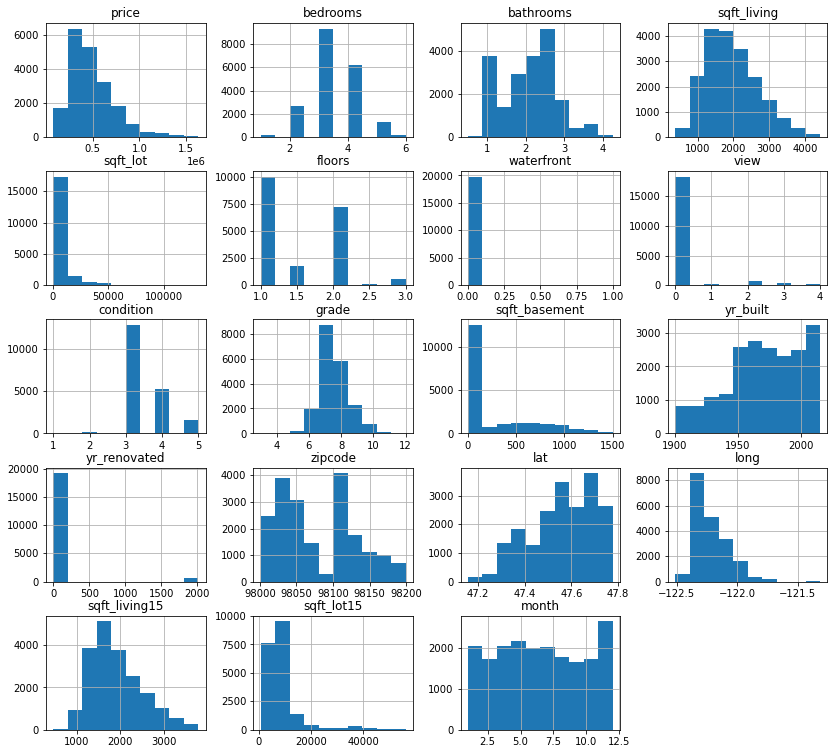

In [44]:
df.hist(figsize=(14,13))

Now, decide which variables are categorical and thus need dummy columns

**Categorical Variables**
- id: identifyer
- waterfront: indicates whether a house has a waterfront or not
- view: indicates whether a house has been viewed
- condition: finite grading scale
- grade: finite grading scale
- zipcode: zipcodes are finite categories
- month: finite 1-12 month

In [45]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(df['waterfront'], prefix = 'waterfront', drop_first=True)
view_dummy = pd.get_dummies(df['view'], prefix = 'view', drop_first=True)
condition_dummy = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(df['grade'], prefix = 'grade', drop_first=True)
zipcode_dummy = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first=True)
month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first=True)

In [46]:
df = df.drop(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'month'], axis=1)
cat_df = pd.concat([waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)
df = pd.concat([df, waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)

In [47]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1.00,1180,5650,1.0,0,1955,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,400,1951,1991,47.7210,-122.319,1690,7639,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,1933,0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,1987,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now that categorical variables are decided, it's time to remove outliers from continuous variables. Here, an outlier will be treated as a data point that is over 3 standard deviations away from the mean. Also, I am not finding outliers for any data referring to date or location.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Columns: 111 entries, price to month_12
dtypes: float64(5), int64(8), uint8(98)
memory usage: 4.0 MB


In [49]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=111)

## Continuous Variables

Determine continuous variables and log transform for normality


**Continuous variables**

- bedrooms
- bathrooms
- sqft_lot
- floors
- sqft_living
- sqft_basement - dropped due to 0 values for log transform
- yr_built
- yr_renovated
- lat
- long
- sqft_living15
- sqft_lot15

In [50]:
# create list of continuous variables for log transforms
cont = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_living15', 'sqft_lot15']

cont_df = df[cont]

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

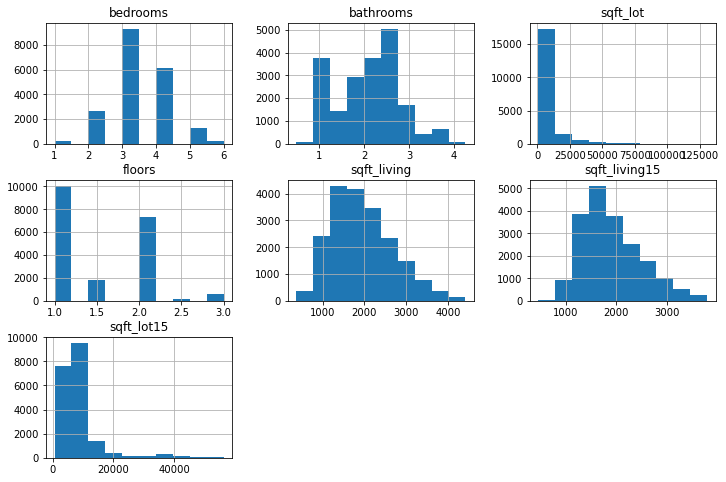

In [51]:
# A good amount look to be biased towards lower values
cont_df.hist(figsize=(12,8))

In [52]:
df.drop('sqft_basement', axis=1, inplace=True)

In [53]:
# log transform for normality
log_cols = [f'{col}_log' for col in cont_df.columns]

cont_log_df = np.log(cont_df)
cont_log_df.columns = log_cols
cont_log_df

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,1.098612,0.000000,8.639411,0.000000,7.073270,7.200425,8.639411
1,1.098612,0.810930,8.887653,0.693147,7.851661,7.432484,8.941022
2,0.693147,0.000000,9.210340,0.000000,6.646391,7.908387,8.994917
3,1.386294,1.098612,8.517193,0.000000,7.580700,7.215240,8.517193
4,1.098612,0.693147,8.997147,0.000000,7.426549,7.495542,8.923058
...,...,...,...,...,...,...,...
21592,1.098612,0.916291,7.030857,1.098612,7.333023,7.333023,7.319202
21593,1.386294,0.916291,8.667852,0.693147,7.745003,7.512071,8.881836
21594,0.693147,-0.287682,7.207860,0.693147,6.927558,6.927558,7.604396
21595,1.098612,0.916291,7.778211,0.693147,7.377759,7.251345,7.160069


In [54]:
# create function to stardize values
def standardize(col):
    return (col - col.mean()) / col.std()

cont_log_norm_df = cont_log_df.apply(standardize)
cont_log_norm_df.head()

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,-0.231294,-1.707722,-0.309821,-0.935577,-1.104888,-1.006221,-0.321210
1,-0.231294,0.434726,0.025236,1.035471,0.902928,-0.241012,0.136071
2,-1.695802,-1.707722,0.460773,-0.935577,-2.205998,1.328267,0.217782
3,0.807791,1.194772,-0.474780,-0.935577,0.203998,-0.957368,-0.506507
4,-0.231294,0.123548,0.173022,-0.935577,-0.193624,-0.033079,0.108835


array([[<AxesSubplot:title={'center':'bedrooms_log'}>,
        <AxesSubplot:title={'center':'bathrooms_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'floors_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>,
        <AxesSubplot:title={'center':'sqft_living15_log'}>],
       [<AxesSubplot:title={'center':'sqft_lot15_log'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

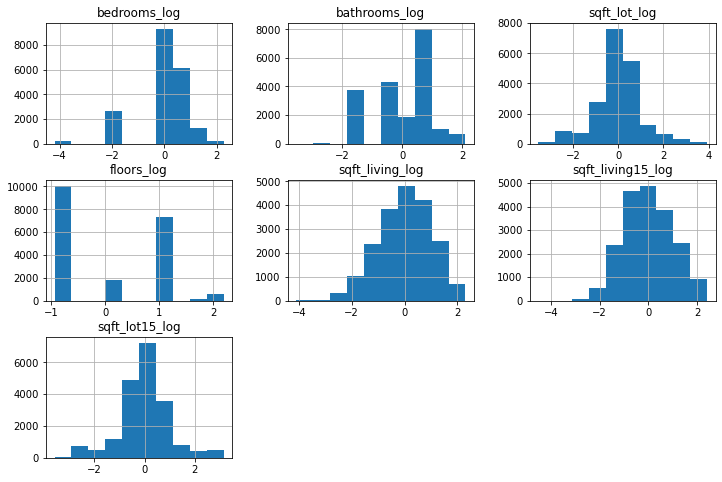

In [75]:
# values look much more normally distributed
cont_log_norm_df.hist(figsize=(12,8))

In [84]:
log_df = pd.concat([df, cont_log_norm_df], axis=1)
log_df.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_living15', 'sqft_lot15'], 
            axis=1, inplace=True)

In [85]:
log_df

,price,yr_built,yr_renovated,lat,long,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,...,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,221900.0,1955,0,47.5112,-122.257,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.231294,-1.707722,-0.309821,-0.935577,-1.104888,-1.006221,-0.321210
1,538000.0,1951,1991,47.7210,-122.319,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.231294,0.434726,0.025236,1.035471,0.902928,-0.241012,0.136071
2,180000.0,1933,0,47.7379,-122.233,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.695802,-1.707722,0.460773,-0.935577,-2.205998,1.328267,0.217782
3,604000.0,1965,0,47.5208,-122.393,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.807791,1.194772,-0.474780,-0.935577,0.203998,-0.957368,-0.506507
4,510000.0,1987,0,47.6168,-122.045,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.231294,0.123548,0.173022,-0.935577,-0.193624,-0.033079,0.108835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,2009,0,47.6993,-122.346,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.231294,0.713085,-2.480912,2.188460,-0.434869,-0.568982,-2.322812
21593,400000.0,2014,0,47.5107,-122.362,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.807791,0.713085,-0.271433,1.035471,0.627809,0.021426,0.046338
21594,402101.0,2009,0,47.5944,-122.299,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.695802,-2.467768,-2.242009,1.035471,-1.480743,-1.905993,-1.890422
21595,400000.0,2004,0,47.5345,-122.069,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Regression Models

In [66]:
#X_init = pd.concat([cont_df, cat_df], axis=1)
y = df['price'] # outcome

### Initial Model

This model will be the initial model - without using log transforms on continuous variables

In [97]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)

In [98]:
formula = outcome + '~' + pred_sum

In [99]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+waterfront_1+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_9811

In [100]:
init_model = ols(formula=formula, data=df).fit()
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     923.9
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:31:52   Log-Likelihood:            -2.5606e+05
No. Observations:               19836   AIC:                         5.123e+05
Df Residuals:                   19726   BIC:                         5.132e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.38e+07   4.21e+06     -3.280      0.001    -2.2e+07   -5.55e+06
bedrooms      -2918.5026   1100.834     -2.651      0.008   -5076.231    -760.775
bathrooms       1.63e+04   1760.372      9.260      0.000    1.29e+04    1.98e+04
sqft_living     110.1577      2.042     53.944      0.000     106.155     114.160
sqft_lot          1.0986      0.116      9.442      0.000       0.870       1.327
floors        -2778.1097   1818.529     -1.528      0.127   -6342.580     786.360
yr_built       -483.5642     41.996    -11.514      0.000    -565.880    -401.248
yr_renovated     20.7490      2.105      9.857      0.000      16.623      24.875
lat            4.499e+04   4.23e+04      1.064      0.288   -3.79e+04    1.28e+05
long          -1.031e+05   3.13e+04     -3.293      0.001   -1.65e+05   -4.18e+04
sqft_living15    25.7620      2.071     12.441      0.000      21.703      29.821
sqft_lot15       -0.6214      0.174     -3.565      0.000      -0.963      -0.280
waterfront_1   2.427e+05   1.46e+04     16.607      0.000    2.14e+05    2.71e+05
view_1         6.122e+04   6036.501     10.142      0.000    4.94e+04    7.31e+04
view_2         6.575e+04   3794.060     17.329      0.000    5.83e+04    7.32e+04
view_3         1.223e+05   5539.843     22.075      0.000    1.11e+05    1.33e+05
view_4         2.211e+05   9066.951     24.390      0.000    2.03e+05    2.39e+05
condition_2     5.65e+04   2.03e+04      2.785      0.005    1.67e+04    9.63e+04
condition_3     8.01e+04   1.88e+04      4.262      0.000    4.33e+04    1.17e+05
condition_4    1.004e+05   1.88e+04      5.341      0.000    6.36e+04    1.37e+05
condition_5    1.369e+05   1.89e+04      7.232      0.000    9.98e+04    1.74e+05
grade_4       -1.111e+05      1e+05     -1.109      0.268   -3.07e+05    8.53e+04
grade_5       -1.283e+05   9.86e+04     -1.301      0.193   -3.21e+05     6.5e+04
grade_6       -1.196e+05   9.84e+04     -1.215      0.224   -3.12e+05    7.33e+04
grade_7        -1.01e+05   9.84e+04     -1.026      0.305   -2.94e+05    9.19e+04
grade_8       -6.008e+04   9.84e+04     -0.610      0.542   -2.53e+05    1.33e+05
grade_9        3.205e+04   9.85e+04      0.325      0.745   -1.61e+05    2.25e+05
grade_10        1.19e+05   9.85e+04      1.207      0.227   -7.42e+04    3.12e+05
grade_11       2.204e+05    9.9e+04      2.227      0.026    2.65e+04    4.14e+05
grade_12       2.639e+05   1.21e+05      2.188      0.029    2.75e+04       5e+05
zipcode_98002  1.554e+04   8975.619      1.731      0.083   -2057.007    3.31e+04
zipcode_98003 -3586.1066   8033.053     -0.446      0.655   -1.93e+04    1.22e+04
zipcode_98004  5.953e+05   1.57e+04     37.865      0.000    5.65e+05    6.26e+05
zipcode_98005  3.259e+05   1.65e+04     19.697      0.000    2.93e+05    3.58e+05
zipcode_98006  2.547e+05   1.36e+04     18.675   

**Initial Observations:**

- Relatively good R-squared: .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [102]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Calculate Root MSE for train and test sets

In [103]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 98206.62317133605
Test Root Mean Squarred Error: 96279.087631628


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- non-linear/polynomial regression

### Log Transform Model

In [114]:
X_log = pd.concat([cont_log_norm_df, cat_df], axis=1)

y = df['price']

In [115]:
outcome = 'price'
log_predictors = X_log
pred_sum = '+'.join(log_predictors.columns)

In [116]:
formula = outcome + '~' + pred_sum

In [117]:
formula

'price~bedrooms_log+bathrooms_log+sqft_lot_log+floors_log+sqft_living_log+sqft_living15_log+sqft_lot15_log+waterfront_1+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+z

In [118]:
log_model = ols(formula=formula, data=log_df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     917.9
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:34:20   Log-Likelihood:            -2.5643e+05
No. Observations:               19836   AIC:                         5.131e+05
Df Residuals:                   19730   BIC:                         5.139e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.448e+05   1.02e+05      3.372      0.001    1.44e+05    5.45e+05
bedrooms_log      -2098.0124    983.233     -2.134      0.033   -4025.232    -170.792
bathrooms_log      4575.3159   1198.558      3.817      0.000    2226.041    6924.591
sqft_lot_log       2.864e+04   1787.479     16.020      0.000    2.51e+04    3.21e+04
floors_log         4594.6983   1006.439      4.565      0.000    2621.993    6567.403
sqft_living_log    7.361e+04   1557.884     47.249      0.000    7.06e+04    7.67e+04
sqft_living15_log  1.355e+04   1209.664     11.205      0.000    1.12e+04    1.59e+04
sqft_lot15_log    -5298.1629   1796.875     -2.949      0.003   -8820.190   -1776.136
waterfront_1       2.415e+05   1.49e+04     16.249      0.000    2.12e+05    2.71e+05
view_1             6.585e+04   6143.442     10.718      0.000    5.38e+04    7.79e+04
view_2             6.974e+04   3857.126     18.082      0.000    6.22e+04    7.73e+04
view_3             1.319e+05   5629.174     23.439      0.000    1.21e+05    1.43e+05
view_4              2.26e+05   9220.966     24.514      0.000    2.08e+05    2.44e+05
condition_2        6.251e+04   2.07e+04      3.025      0.002     2.2e+04    1.03e+05
condition_3        8.649e+04   1.91e+04      4.518      0.000     4.9e+04    1.24e+05
condition_4         1.06e+05   1.92e+04      5.535      0.000    6.85e+04    1.44e+05
condition_5        1.475e+05   1.93e+04      7.649      0.000     1.1e+05    1.85e+05
grade_4           -1.336e+05   1.02e+05     -1.309      0.190   -3.34e+05    6.64e+04
grade_5           -1.834e+05      1e+05     -1.826      0.068    -3.8e+05    1.35e+04
grade_6           -1.966e+05      1e+05     -1.961      0.050   -3.93e+05     -79.579
grade_7           -1.968e+05      1e+05     -1.963      0.050   -3.93e+05    -290.993
grade_8            -1.56e+05      1e+05     -1.556      0.120   -3.53e+05    4.06e+04
grade_9            -5.19e+04      1e+05     -0.517      0.605   -2.49e+05    1.45e+05
grade_10           5.193e+04      1e+05      0.517      0.605   -1.45e+05    2.49e+05
grade_11           1.712e+05   1.01e+05      1.699      0.089   -2.63e+04    3.69e+05
grade_12           2.611e+05   1.23e+05      2.126      0.034    2.04e+04    5.02e+05
zipcode_98002       2.15e+04   8959.867      2.399      0.016    3936.950    3.91e+04
zipcode_98003      6240.1922   8086.552      0.772      0.440   -9610.130    2.21e+04
zipcode_98004      6.198e+05   8718.081     71.094      0.000    6.03e+05    6.37e+05
zipcode_98005      3.421e+05   1.01e+04     33.981      0.000    3.22e+05    3.62e+05
zipcode_98006      2.677e+05   7478.039     35.801      0.000    2.53e+05    2.82e+05
zipcode_98007      2.614e+05   1.02e+04     25.671      0.000    2.41e+05    2.81e+05
zipcode_98008      2.578e+05   8142.756     31.659      0.000    2.42e+05

**Initial Observations:**

- Relatively good R-squared: .830 -> decreased from .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(log_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [120]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 99090.42277100302
Test Root Mean Squarred Error: 101825.27323479424


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- non-linear/polynomial regression

In [122]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,1.983600e+04,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,...,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,4.891005e+05,3.315084,2.038579,1946.600474,9570.022484,1.480314,1970.213400,64.295927,47.560487,-122.220826,1903.911373,8751.673624,0.003277,0.014166,0.037911,0.017292,0.008570,0.007713,0.647762,0.264670,0.078443,0.001361,0.011494,0.099768,0.438647,0.291188,0.113884,0.037961,0.005545,0.000101,0.009881,0.013662,0.010889,0.007058,0.019460,0.006755,0.013612,0.003882,0.009427,0.003983,0.008117,0.008873,0.024350,0.002117,0.015729,0.013914,0.015527,0.012603,0.013460,0.006201,...,0.019762,0.021779,0.021527,0.013712,0.003226,0.012301,0.019964,0.015880,0.007512,0.014872,0.004789,0.029794,0.010385,0.016737,0.013158,0.009276,0.005092,0.010990,0.028887,0.016082,0.027425,0.024753,0.008722,0.014015,0.020065,0.017746,0.024602,0.012956,0.016384,0.014368,0.002874,0.021678,0.012049,0.013460,0.011696,0.012855,0.006705,0.013662,0.014771,0.058429,0.087114,0.103549,0.109649,0.101129,0.101885,0.090038,0.082930,0.086862,0.065588,0.068058
std,2.415012e+05,0.853372,0.690893,729.474879,10305.656756,0.539050,29.491425,352.431898,0.139045,0.136821,588.228013,7390.522090,0.057152,0.118179,0.190986,0.130360,0.092181,0.087488,0.477680,0.441169,0.268875,0.036870,0.106596,0.299698,0.496234,0.454321,0.317678,0.191107,0.074263,0.010041,0.098914,0.116086,0.103785,0.083716,0.138137,0.081915,0.115875,0.062185,0.096638,0.062984,0.089728,0.093779,0.154136,0.045967,0.124428,0.117137,0.123641,0.111558,0.115238,0.078503,...,0.139185,0.145964,0.145135,0.116297,0.056712,0.110228,0.139879,0.125015,0.086346,0.121

In [45]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011592,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.011572
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.395734,0.036056,0.667951,0.605368,0.323799,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,-0.009928
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078523,0.026496,0.356563,0.479386,0.302808,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,-0.001046
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186451,-0.126479,0.665838,0.686668,0.283440,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.007543
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.282532,-0.059445,0.762779,0.876448,0.435130,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.012112
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075298,-0.008830,0.114731,0.184139,0.015418,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.002591
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028436,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.014245
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.382000,0.016648,0.082818,0.071778,0.082800,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.008199
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.005327
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045735,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.022388
